In [52]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import random

**B)**

In [53]:
def gradian(x1,x2):
    f_x1=4*x1 + 3.4*math.pi*x2*np.sin(0.2*math.pi*x1) -x2
    f_x2=4*x2 - 17*np.cos(0.2*math.pi*x1)- x1
    f=[[f_x1], 
       [f_x2]]
    return np.array(f)

In [54]:
def hessian(x1,x2):
    f_x1_x1=4 + 0.68*(math.pi**2)*x2*np.cos(0.2*math.pi*x1)
    f_x1_x2=4*math.pi*np.sin(0.2*math.pi*x1) - 1
    f_x2_x1=-1 + 3.4*math.pi*np.sin(0.2*math.pi*x1)
    f_x2_x2= 4
    h=[[f_x1_x1, f_x1_x2],
       [f_x2_x1, f_x2_x2]]
    return np.array(h)
    

In [55]:
def func(x1,x2):
    return 2*x1**2 + 2*x2**2 - 17*x2*np.cos(0.2*math.pi*x1) - x1*x2

In [56]:
def optimize(x,n):
    for i in range(n):
        delta_f=gradian(x[0],x[1])
        h=hessian(x[0],x[1])
        h_inverse=np.linalg.inv(h)
        delta=np.dot(h_inverse, delta_f)
        x= x - np.ndarray. flatten (delta)

    minimum=func(x[0],x[1])
    return minimum,x
    

In [57]:
x0=np.array([1,3])
minimum,x=optimize(x,10)

In [58]:
print("x1 optimum: "+ str(x[0]))
print("x2 optimum: "+ str(x[1]))
print("minimum of f(x1,x2):" + str(minimum))

x1 optimum: 0.13087466007249957
x2 optimum: 4.268357652256218
minimum of f(x1,x2):-36.40349774185023


In [59]:
optimum=[]
x2=np.arange(0,10.5,0.5)
x1=np.arange(-5,5.5,0.5)


In [60]:
dist_x=[]
d_min=-36.4
for i in range(len(x1)):
    for j in range(len(x2)):
        x=np.array([x1[i],x2[j]])
        opt,_=optimize(x,20)
        dist=np.abs(opt-d_min)
        dist_x.append([dist,x[0], x[1]])
        


In [61]:
dist_x=np.array(dist_x)

df=pd.DataFrame({'distance':dist_x[:,0], 'x1':dist_x[:,1], 'x2':dist_x[:,2]})

df_close = df[df['distance'] <= 10]
df_farther = df[df['distance'] >= 50]
df_far = df[(df['distance'] > 10) & (df['distance'] < 50) ]


In [62]:
x1_close=np.array(df_close['x1'])
x2_close=np.array(df_close['x2'])
x1_far=np.array(df_far['x1'])
x2_far=np.array(df_far['x2'])
x1_farther=np.array(df_farther['x1'])
x2_farther=np.array(df_farther['x2'])

Text(0.5, 1.0, 'comparing differnet initial value')

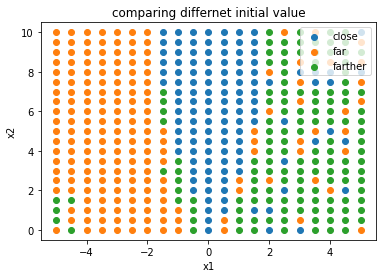

In [64]:
plt.scatter(x1_close,x2_close)
plt.scatter(x1_far,x2_far)
plt.scatter(x1_farther,x2_farther)
plt.legend(["close","far", "farther"])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("comparing differnet initial value")

we can see that the initial value is important becouse the minimum point of all values are not the same. sometimes we converge to a local minimum

**C)**

we create a function called initial population that randomly chooses n pairs of x1 and x2 for the initial generation. each pair [x1,x2] is one member of the generation

In [35]:
def initial_gen(n,x1_range,x2_range):
    gen=[]
    for i in range(n):
        x1=random.randint(x1_range[0], x1_range[-1])
        x2=random.randint(x2_range[0], x2_range[-1])
        gen.append([x1,x2])
    return gen
        

we create a function called "fitness_pop". it calculates the fitness function for each member. since we want to minimize the "func"
in part A, we choose "func" as our fitness function

In [21]:
def fitness_pop(population):
    score=[]
    n=len(population)
    for i in range(n):
        s=func(population[i][0],population[i][1])
        score.append(s)
    return score

we select from the older generation. first we calculate their scores using the "fitness_pop".
we make sure to select the best person(with munimum score).
thhen we randomly choose 2 people and select the best one

In [36]:
def selection(pop):
    scores = fitness_pop(pop)
    best_person = pop[scores.index(min(scores))]
    pop_select = [best_person]
    while (len(pop_select) != len(pop)):
        idx_1 = random.randint(0, len(pop)-1)
        idx_2 = random.randint(0, len(pop)-1)
        if scores[idx_1] <= scores[idx_2]:
            pop_select.append(pop[idx_1])
        else:
            pop_select.append(pop[idx_2])
    return pop_select    
                
      
    

we define a function called "deci_binary". that changes the number from decimal to binary. we make sure each number has 4 bits.

In [15]:
def deci_binary(x):
    x = np.abs(x)
    x= str(bin(x).replace("0b", ""))
    while len(x) != 4:
        x = '0' + x
    return x

we define a function called "reproduce" that does cross over and mutation

In [33]:
def reproduce(x,y):
        s_x=np.sign(x)
        s_y=np.sign(y)
        x = deci_binary(x)
        y = deci_binary(y)
        p = random.randint(0, 2)
        
        if p == 0:
            x_new = y[0]+x[1]+y[2]+x[3]
            y_new = x[0]+y[1]+y[2]+y[3]
        elif p == 1:
            x_new = y[0]+y[1]+x[2]+x[3]
            y_new = x[0]+x[1]+y[2]+y[3]
        else:
            x_new = y[0]+x[1]+x[2]+x[3]
            y_new = x[0]+x[1]+x[2]+y[3]  
        x_new=int(str(x_new), 2) 
        y_new=int(str(y_new), 2) 
        
        return [s_x*x_new, s_y*y_new]
        

we select parents and reproduce 2 children from them

In [17]:
def cross_over(gen):
    new_gen=[]
    parents=[]
    while(gen):
        idx = random.randrange(0,len(gen))
        par_1=gen.pop(idx)
        idx = random.randrange(0,len(gen))
        par_2=gen.pop(idx)
        x_child_1, x_child_2 = reproduce(par_1[0], par_2[0])
        y_child_1, y_child_2 = reproduce(par_1[1], par_2[1])
        new_gen.append([x_child_1,y_child_1])
        new_gen.append([x_child_2,y_child_2])
    return new_gen

In [42]:
gen = initial_population(1000,[-15,15],[-15,15])
for i in range(50):
    gen = selection(gen)
    gen = cross_over(gen)

In [46]:
final_gen=gen
final_fitness=fitness_pop(final_gen)

In [50]:
x=final_gen[last_fitness.index(min(final_fitness))]
f_opt=func(x[0],x[1])
print("x1 optimum: "+ str(x[0]))
print("x2 optimum: "+ str(x[1]))
print("minimum of f(x1,x2):" + str(f_opt))

x1 optimum: 0
x2 optimum: 4
minimum of f(x1,x2):-36.0


as we used integers inorder to work easier with binary numbers, we have a little error but thr overall answear is close